In [1]:
import numpy as np
import os
from os.path import isfile
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, TimeDistributed, LSTM, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Flatten, Conv2D, BatchNormalization, Lambda
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras import backend
from keras.utils import np_utils
from keras.optimizers import Adam, RMSprop
from keras import regularizers
import librosa
import librosa.display
import matplotlib.pyplot as plt
from src.music_helpers import conv_recurrent_model_build, train_model, show_summary_stats

Using TensorFlow backend.


In [2]:
genre_dict = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 
               'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7  }
reverse_map = {v: k for k, v in genre_dict.items()}

In [3]:
npzfile = np.load('saved_variables/full_train.npz')
X_train = npzfile['arr_0']
y_train = npzfile['arr_1']
print(X_train.shape, y_train.shape)

(6394, 640, 128) (6394,)


In [4]:
npzfile = np.load('saved_variables/val_arr.npz')
X_val = npzfile['arr_0']
y_val = npzfile['arr_1']
print(X_val.shape, y_val.shape)

(800, 640, 128) (800,)


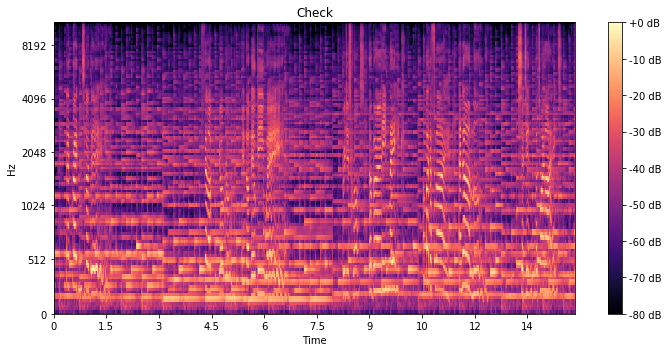

In [55]:
spect = X_train[5]
genre = np.argmax(y_train[5])
plt.figure(figsize=(10, 5))
librosa.display.specshow(spect.T, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Check')
plt.tight_layout()

In [10]:
batch_size = 32
num_classes = 8
n_features = X_train.shape[2]
n_time = X_train.shape[1]

In [26]:
N_LAYERS = 3
FILTER_LENGTH = 5
CONV_FILTER_COUNT = 56
BATCH_SIZE = 32
LSTM_COUNT = 96
EPOCH_COUNT = 70
NUM_HIDDEN = 64
L2_regularization = 0.001

In [42]:
model, history= train_model(X_train, y_train, X_val, y_val)

Building model...
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 128)         0         
_________________________________________________________________
convolution_1 (Conv1D)       (None, None, 56)          35896     
_________________________________________________________________
batch_normalization_28 (Batc (None, None, 56)          224       
_________________________________________________________________
activation_31 (Activation)   (None, None, 56)          0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, None, 56)          0         
_________________________________________________________________
dropout_46 (Dropout)         (None, None, 56)          0         
_________________________________________________________________
convolution_2 (Conv1D)       (None, None